#### Loan Approval Dataset

This is is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. it contains serveral parameters such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status.



In [457]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./loan_approval_dataset.csv')
df.head(25)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [460]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Data Understanding 

Question 1
1. Provide the number of rows and columns in this dataset.

In [461]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print (f"Number of rows {num_rows}")
print (f"Number of columns {num_cols}")

Number of rows 4269
Number of columns 13


Question 2

2. Which columns had no missing values? Provide a set of column names that have no missing values.

In [462]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.

no_nulls

{' bank_asset_value',
 ' cibil_score',
 ' commercial_assets_value',
 ' education',
 ' income_annum',
 ' loan_amount',
 ' loan_status',
 ' loan_term',
 ' luxury_assets_value',
 ' no_of_dependents',
 ' residential_assets_value',
 ' self_employed',
 'loan_id'}

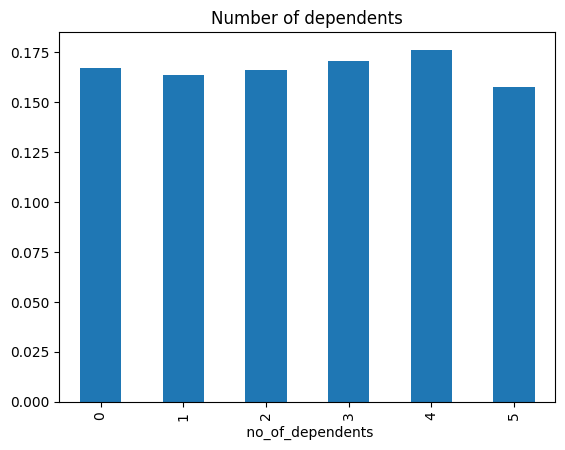

In [464]:
num_order=list(range(6))
status_vals=df[' no_of_dependents'].value_counts()
(status_vals/df.shape[0]).loc[num_order].plot(kind="bar");
plt.title("Number of dependents");

## Credit Score Analysis

In [384]:
print("Count of very poor credit score ->",
      df[(df[' cibil_score'] > 299) &
                (df[' cibil_score'] < 580)][' no_of_dependents'].count())


Count of very poor credit score -> 1983


In [455]:

def plot_credit_scores(data_frame):
    '''INPUT
        data_frame- loan approval dataset
    
    OUTPUT
        a bar plot based on the credit score types
    
    '''
    # Define the FICO credit score ranges and their corresponding types
    fico_ranges = {
        (300, 579): "Very Poor",
        (580, 669): "Fair",
        (670, 739): "Good",
        (740, 799): "Very Good",
        (800, 850): "Exceptional"
    }

    # Categorize the credit scores based on the FICO ranges
    def categorize_fico_score(score):
        for range_min, range_max in fico_ranges.keys():
            if range_min <= score <= range_max:
                return fico_ranges[(range_min, range_max)]
        return "Unknown"

    # Apply the categorization to the credit scores in the DataFrame
    data_frame['Credit Score Type'] = data_frame[' cibil_score'].apply(categorize_fico_score)

    # Generate a bar plot based on the credit score types
    score_counts = data_frame['Credit Score Type'].value_counts()
    score_counts.plot(kind='bar')
    plt.xlabel('Credit Score Type')
    plt.ylabel('Count')
    plt.title('Credit Scores by Type')
    plt.xticks(rotation=45)
    plt.show()
    return data_frame[' cibil_score'].apply(categorize_fico_score)



/var/folders/sc/xc7w897j037g8n7b4jtbj9g40000gn/T/ipykernel_35463/3711552506.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Credit Score Type'] = data_frame[' cibil_score'].apply(categorize_fico_score)


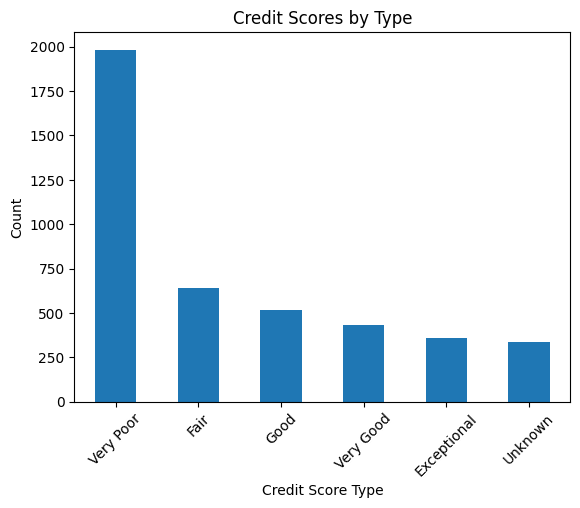

In [388]:
score=df[[' cibil_score']]
plot_credit_scores(score);

In [415]:

def calculate_poverty_levels(data_frame):
    '''INPUT
        data_frame- loan approval dataset
    
    OUTPUT
        a bar plot based on the poverty levels
    
    '''
    # Define Federal poverty level thresholds based on the number of dependents
    # You can adjust these thresholds based on the latest guidelines
    poverty_levels = {
        0: 1249000,
        1: 1691000,
        2: 2133000,
        3: 2575000,
        4: 3017000,
        5: 3459000,
        6: 3901000,
        7: 4343000,
        
    }

    # Calculate Federal poverty levels for each row in the DataFrame
    def calculate_poverty_level(row):
        num_dependents = row[' no_of_dependents']
        annual_income = row[' income_annum']
        poverty_level = poverty_levels.get(num_dependents, None)
        if poverty_level is not None:
            return 'Above Poverty Level' if annual_income > poverty_level else 'Below Poverty Level'
        return 'Unknown'
    
    def calculate_federal_poverty_level(row):
        num_dependents = row[' no_of_dependents']
        annual_income = row[' income_annum']
        poverty_level = poverty_levels.get(num_dependents, 0)
        return annual_income / poverty_level

    # Apply the poverty level calculation to the DataFrame
    data_frame['Poverty Level'] = data_frame.apply(calculate_poverty_level, axis=1)
    data_frame['Federal Poverty Level'] = data_frame.apply(calculate_federal_poverty_level, axis=1)

    # Generate a bar plot based on the poverty levels
    poverty_counts = data_frame['Poverty Level'].value_counts()
    poverty_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.xlabel('Poverty Level')
    plt.ylabel('Count')
    plt.title('Poverty Levels')
    plt.xticks(rotation=0)
    plt.show()


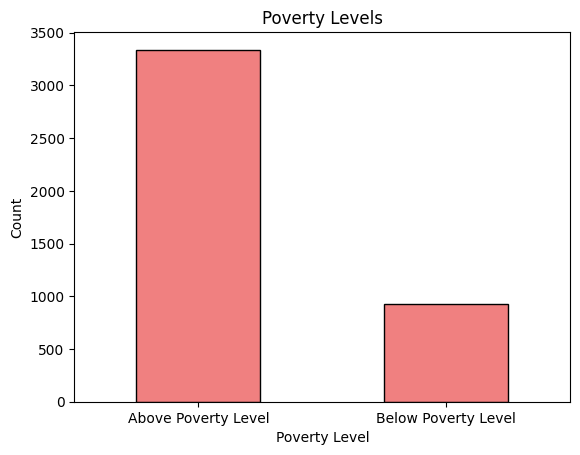

In [416]:
 calculate_poverty_levels(df)

In [405]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the education column
    
    OUTPUT
        return 1 if the string is  in ("Graduate")
        return 0 otherwise
    
    '''
    if formal_ed_str in (" Graduate"):
        return 1
    else:
        return 0


In [408]:
df['Education'] = df[' education'].apply(higher_ed)[:30]

In [409]:
def employment(status):
    '''
    INPUT
        status - a string of one of the values from the sel_employed column
    
    OUTPUT
        return 1 if the string is  in ("Yes")
        return 0 otherwise
    
    '''
    if status in (" Yes"):
        return 1
    else:
        return 0


In [417]:
df['Self Employed'] = df[' self_employed'].apply(employment)[:30]
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Poverty Level,Self Employed,Decision,Education,Federal Poverty Level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Above Poverty Level,0.0,1,1.0,4.500703
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Above Poverty Level,1.0,0,0.0,3.282626
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Above Poverty Level,0.0,0,1.0,3.533981
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Above Poverty Level,0.0,0,1.0,3.184466
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Above Poverty Level,1.0,0,0.0,2.833189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Below Poverty Level,NaN,0,NaN,0.289101
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Above Poverty Level,NaN,1,NaN,2.642114
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Above Poverty Level,NaN,0,NaN,3.047351
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Above Poverty Level,NaN,1,NaN,2.424601


In [411]:
def decision(status):
    '''
    INPUT
        status - a string of one of the values from the loan_status column
    
    OUTPUT
        return 1 if the string is  in ("Approved")
        return 0 otherwise
    
    '''
    if status in (" Approved"):
        return 1
    else:
        return 0

df['Decision'] = df[' loan_status'].apply(decision)
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Poverty Level,Self Employed,Decision,Education
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Above Poverty Level,0.0,1,1.0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Above Poverty Level,1.0,0,0.0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Above Poverty Level,0.0,0,1.0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Above Poverty Level,0.0,0,1.0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Above Poverty Level,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Below Poverty Level,NaN,0,NaN
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Above Poverty Level,NaN,1,NaN
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Above Poverty Level,NaN,0,NaN
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Above Poverty Level,NaN,1,NaN


### Distribution of Loan Status

The number of approved loans is higher than the number of rejected loans 

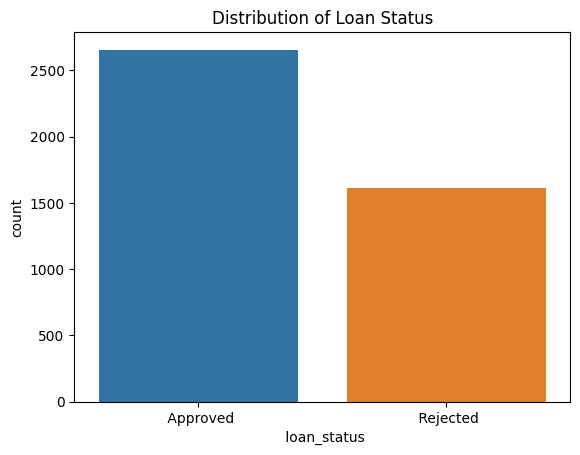

In [479]:
sns.countplot(x=' loan_status',data=df)
plt.title('Distribution of Loan Status')
plt.show()

### How does education level affect loan decision?

The number of graduates is slightly higher than the number of non-graduates among the loan applicants. The loan approval rate seems to be slightly higher for graduates than for non-graduates.

 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64


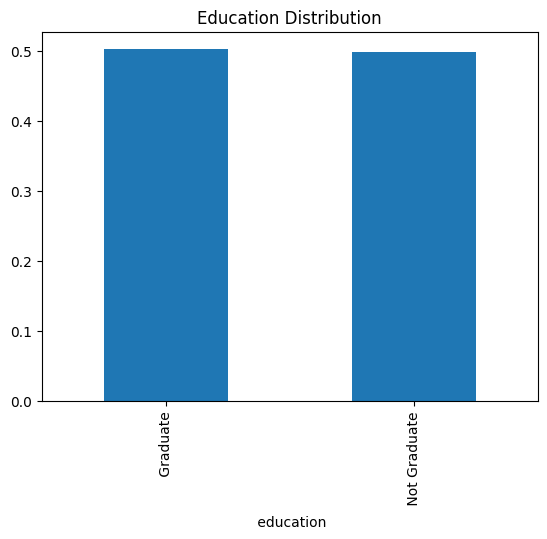

In [486]:
print(df[' education'].value_counts())
status_vals=df[' education'].value_counts()
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Education Distribution");

Text(0.5, 1.0, 'CIBIL Score Distribution by Education')

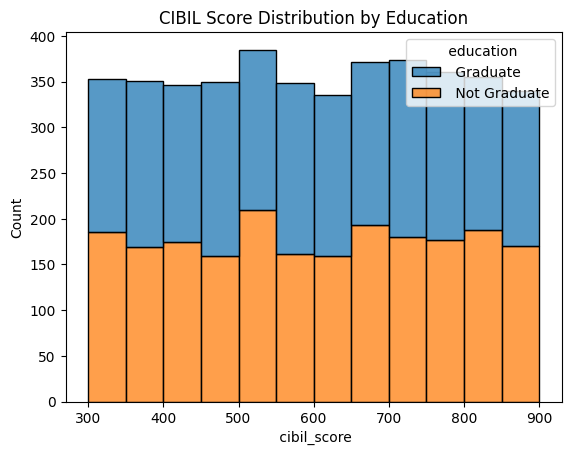

In [510]:
sns.histplot(data=df, x=' cibil_score', hue=' education', multiple='stack', binwidth=50)
plt.title('CIBIL Score Distribution by Education')

<Figure size 800x600 with 0 Axes>

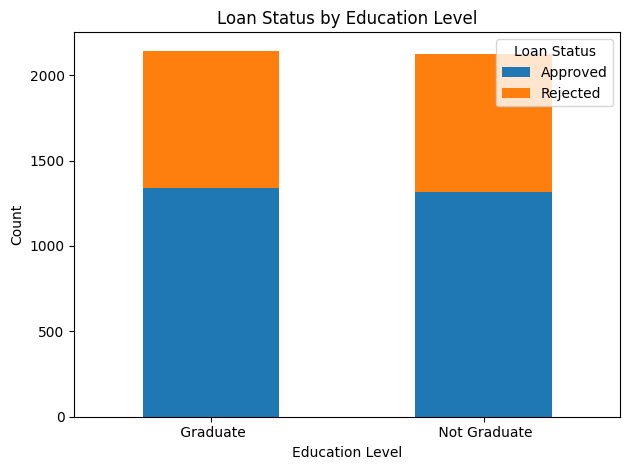

In [498]:
education_loan_status_counts = df.groupby([' education', ' loan_status']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(8, 6));
education_loan_status_counts.plot(kind='bar', stacked=True)
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Education  Distribution by Loan Status')

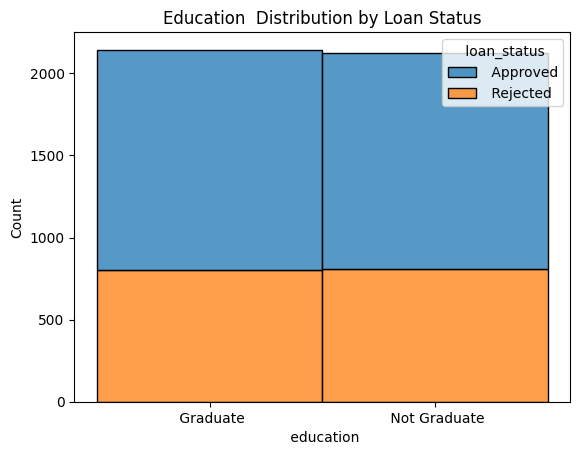

In [493]:
sns.histplot(data=df, x=' education', hue=' loan_status', multiple='stack', binwidth=50)
#sns.scatterplot(data=df, x=' education', y=' income_annum', hue=' loan_status')
plt.title('Education  Distribution by Loan Status')

Text(0.5, 1.0, 'Cibil Score vs Education')

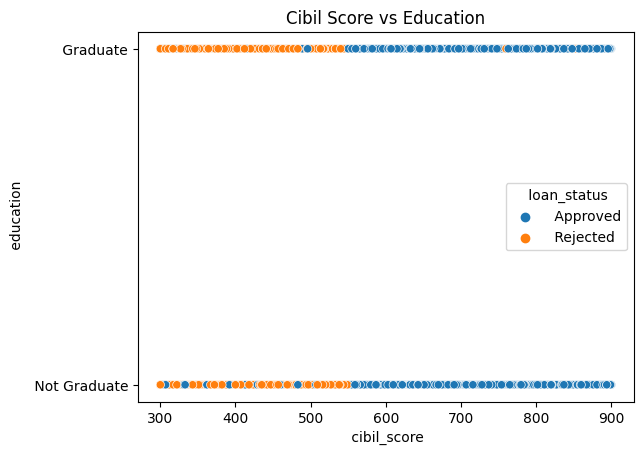

In [487]:
sns.scatterplot(data=df, x=' cibil_score' , y=' education', hue=' loan_status')
plt.title('Cibil Score vs Education')

### How does CIBIL Score affect loan decision?

Most of the applicants have very poor credit CIBIL score. It appears that loans are more likely to be approved for applicants with higher CIBIL scores. The distribution of rejected loans tends to skew towards lower CIBIL scores, while the distribution of approved loans is more evenly spread and has a slight skew towards higher CIBIL scores.

/var/folders/sc/xc7w897j037g8n7b4jtbj9g40000gn/T/ipykernel_35463/39753484.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Credit Score Type'] = data_frame[' cibil_score'].apply(categorize_fico_score)


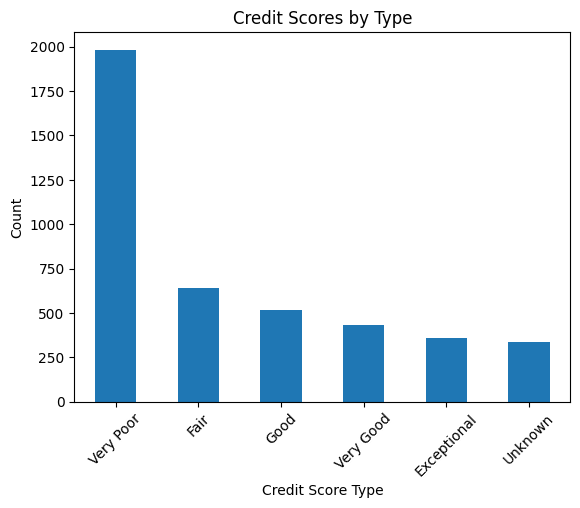

In [504]:
plot_credit_scores(df[[' cibil_score']]);

Text(0.5, 1.0, 'CIBIL Score Distribution by Loan Status')

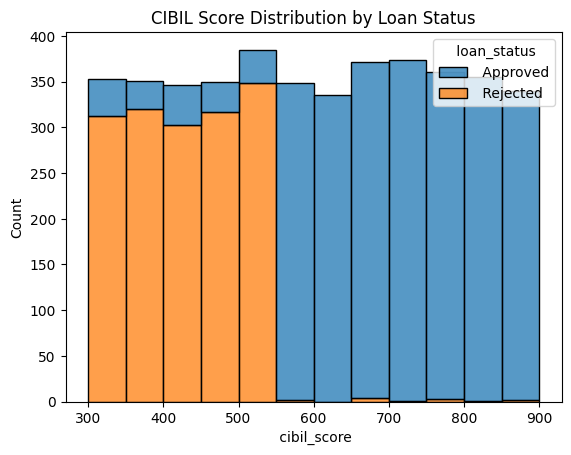

In [514]:
sns.histplot(data=df, x=' cibil_score', hue=' loan_status', multiple='stack', binwidth=50);
plt.title('CIBIL Score Distribution by Loan Status')

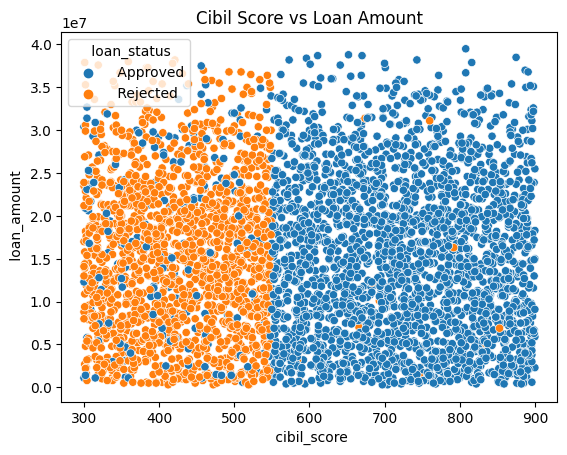

In [512]:
sns.scatterplot(x=' cibil_score', y=' loan_amount', hue=' loan_status', data=df)
plt.title('Cibil Score vs Loan Amount')
plt.show()

###  Annual Income 

Do people with higher income have better CIBIL score and more likely to get approved for loan ?
 Income alone cannot predict loan approval. The median income of approved loans seems to be slightly higher than the median income of rejected loans.

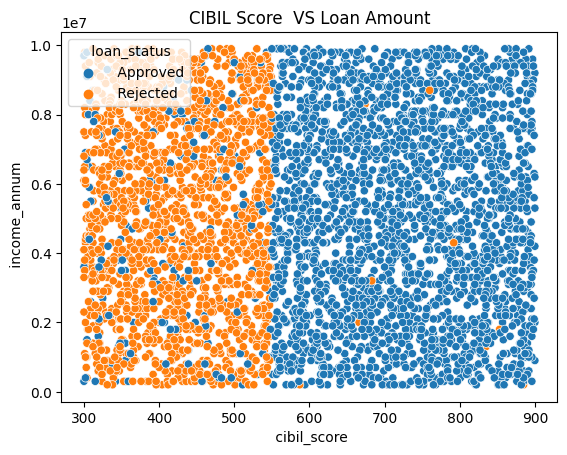

In [527]:
sns.scatterplot(data=df, x=' cibil_score', y=' income_annum',  hue=' loan_status')
plt.title('CIBIL Score  VS Loan Amount')
plt.show()

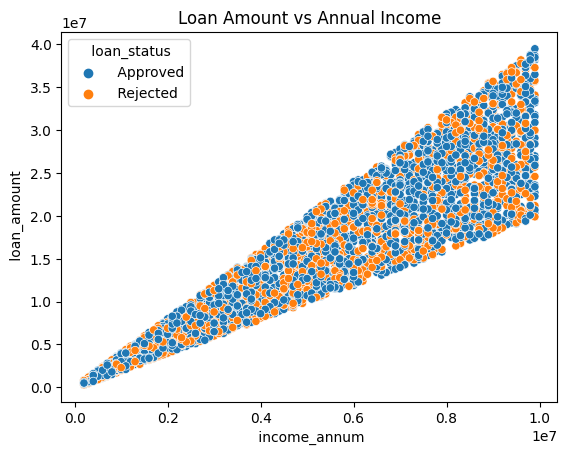

In [513]:
sns.scatterplot(data=df, x=' income_annum', y=' loan_amount', hue=' loan_status')
plt.title('Loan Amount vs Annual Income')
plt.show()

In [428]:
data=df[['loan_id', ' no_of_dependents','Education',' loan_amount', 'Self Employed',' income_annum',' loan_term',' cibil_score', ' residential_assets_value',' bank_asset_value',' commercial_assets_value',' luxury_assets_value','Federal Poverty Level','Decision']]
data

,loan_id,no_of_dependents,Education,loan_amount,Self Employed,income_annum,loan_term,cibil_score,residential_assets_value,bank_asset_value,commercial_assets_value,luxury_assets_value,Federal Poverty Level,Decision
0,1,2,1.0,29900000,0.0,9600000,12,778,2400000,8000000,17600000,22700000,4.500703,1
1,2,0,0.0,12200000,1.0,4100000,8,417,2700000,3300000,2200000,8800000,3.282626,0
2,3,3,1.0,29700000,0.0,9100000,20,506,7100000,12800000,4500000,33300000,3.533981,0
3,4,3,1.0,30700000,0.0,8200000,8,467,18200000,7900000,3300000,23300000,3.184466,0
4,5,5,0.0,24200000,1.0,9800000,20,382,12400000,5000000,8200000,29400000,2.833189,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,NaN,2300000,NaN,1000000,12,317,2800000,800000,500000,3300000,0.289101,0
4265,4266,0,NaN,11300000,NaN,3300000,20,559,4200000,1900000,2900000,11000000,2.642114,1
4266,4267,2,NaN,23900000,NaN,6500000,18,457,1200000,7300000,12400000,18100000,3.047351,0
4267,4268,1,NaN,12800000,NaN,4100000,8,780,8200000,5800000,700000,14100000,2.424601,1


In [427]:
data.describe()

,loan_id,no_of_dependents,Education,loan_amount,Self Employed,income_annum,loan_term,cibil_score,residential_assets_value,bank_asset_value,commercial_assets_value,luxury_assets_value,Federal Poverty Level,Decision
count,4269.000000,4269.000000,30.000000,4.269000e+03,30.000000,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000
mean,2135.000000,2.498712,0.533333,1.513345e+07,0.533333,5.059124e+06,10.900445,599.936051,7.472617e+06,4.976692e+06,4.973155e+06,1.512631e+07,2.413386,0.622160
std,1232.498479,1.695910,0.507416,9.043363e+06,0.507416,2.806840e+06,5.709187,172.430401,6.503637e+06,3.250185e+06,4.388966e+06,9.103754e+06,1.671897,0.484904
min,1.000000,0.000000,0.000000,3.000000e+05,0.000000,2.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,0.000000e+00,3.000000e+05,0.057820,0.000000
25%,1068.000000,1.000000,0.000000,7.700000e+06,0.000000,2.700000e+06,6.000000,453.000000,2.200000e+06,2.300000e+06,1.300000e+06,7.500000e+06,1.156404,0.000000
50%,2135.000000,3.000000,1.000000,1.450000e+07,1.000000,5.100000e+06,10.000000,600.000000,5.600000e+06,4.600000e+06,3.700000e+06,1.460000e+07,2.135922,1.000000
75%,3202.000000,4.000000,1.000000,2.150000e+07,1.000000,7.500000e+06,16.000000,748.000000,1.130000e+07,7.100000e+06,7.600000e+06,2.170000e+07,3.262136,1.000000
max,4269.000000,5.000000,1.000000,3.950000e+07,1.000000,9.900000e+06,20.000000,900.000000,2.910000e+07,1.470000e+07,1.940000e+07,3.920000e+07,7.926341,1.000000


### Heatmap 

<Axes: >

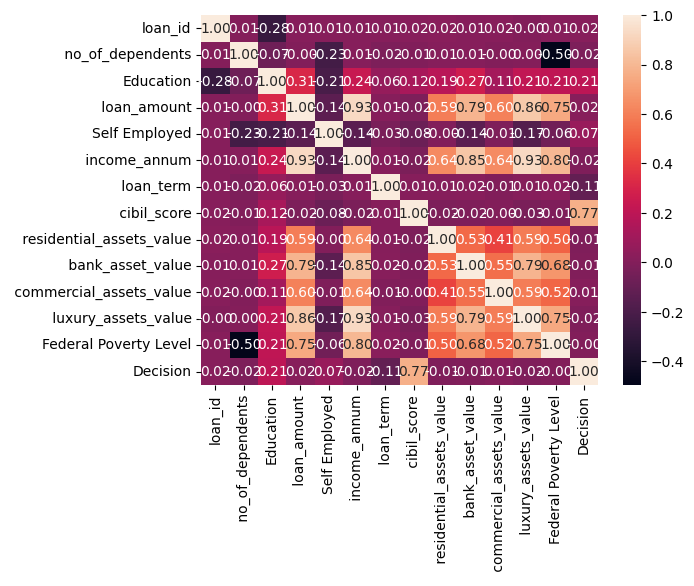

In [429]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [441]:
X = data[[' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value',' luxury_assets_value', ' bank_asset_value']]
y = data['Decision']



In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

# X_train = X_train.replace([np.inf, -np.inf], np.nan)
# X_train = X_train.dropna()
 

In [451]:
lm_model=LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression()

In [452]:
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.586582329142409 on 1281 values.'